In [1]:
import pandas as pd
import tensorflow as tf

In [1]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# if tf.test.gpu_device_name():
#     print('GPU found')
# else:
#     print("No GPU found")

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

#### Download the Boston Housing Dataset into a dataframe  

* Keep in mind this dataset was collected in 1978  
URL for description of columns:
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [5]:
# Can also get the data directly from TF/keras:
#  https://keras.io/api/datasets/boston_housing/

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data', 
                 delim_whitespace=True, 
                 header=None, 
                names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                     'TAX', 'PTRATIO', 'B', 'LSTAT', 'MVAL'])
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MVAL
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [6]:
X = df.drop(columns='MVAL')
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns)
y = df['MVAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MVAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MVAL       float64
dtype: object

In [9]:
X_train.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
330,0.000440,0.0,0.101906,0.0,0.154321,0.494922,0.301751,0.431394,0.130435,0.463740,0.457447,0.928564,0.203091
260,0.006000,0.2,0.128666,0.0,0.539095,0.697835,0.812564,0.089343,0.173913,0.146947,0.042553,0.989662,0.216887
3,0.000293,0.0,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
463,0.065357,0.0,0.646628,0.0,0.674897,0.565626,0.895984,0.152043,1.000000,0.914122,0.808511,0.992234,0.236203
340,0.000620,0.0,0.173387,0.0,0.267490,0.461199,0.572606,0.334876,0.173913,0.070611,0.808511,1.000000,0.208609


In [10]:
y_train.tail()

330    19.8
260    33.8
3      33.4
463    20.2
340    18.7
Name: MVAL, dtype: float64

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


#### 1. Is a Classifier or Regressor better suited to this dataset ?

In [12]:
# As the values are continous the Regressor is best suited for the current dataset

#### 2. Build a Sequential NN with Keras to preidct the median value MVAL column

In [13]:
nn_X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
nn_X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [14]:
# create model
mdl_k = tf.keras.Sequential([tf.keras.layers.Input(shape=(nn_X_train.shape[1], nn_X_train.shape[2]))])

#### 3. Add at least two layers

In [ ]:
# Adding Layers

mdl_k.add(tf.keras.layers.Dense(12, input_dim=3, activation='softmax', kernel_initializer="he_normal"))
mdl_k.add(tf.keras.layers.Dense(8, activation='relu'))

mdl_k.add(tf.keras.layers.LSTM(64))
mdl_k.add(tf.keras.layers.Dense(1, activation='elu'))

#### 4. Compile the Model

In [18]:
# Compile model
mdl_k.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [19]:
mdl_k.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13, 12)            24        
_________________________________________________________________
dense_1 (Dense)              (None, 13, 8)             104       
_________________________________________________________________
lstm (LSTM)                  (None, 64)                18688     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 18,881
Trainable params: 18,881
Non-trainable params: 0
_________________________________________________________________


#### 5. Determine Efficacy of Model.  Which method did you use to determine efficacy ?

In [25]:
# I will be using MSE (Mean Squared Error) method to determine the model efficacy

In [39]:
val_dataset = tf.data.Dataset.from_tensor_slices((nn_X_test, y_test)).batch(batch_size=128)

In [40]:
mdl_k.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()])

In [42]:
history = mdl_k.fit(
    nn_X_train,
    y_train,
    epochs=50,
    batch_size=128,
    # validation_data=(nn_X_test, y_test),
    validation_data=val_dataset,
    #validation_split=0.1,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=2)
#     ],
    use_multiprocessing=True
)

Epoch 1/50
4/4 [==============================] - 0s 19ms/step - loss: 88.9794 - mean_squared_error: 88.9794 - val_loss: 83.0542 - val_mean_squared_error: 83.0542
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 87.7102 - mean_squared_error: 87.7102 - val_loss: 73.9162 - val_mean_squared_error: 73.9162
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 87.9758 - mean_squared_error: 87.9758 - val_loss: 87.4749 - val_mean_squared_error: 87.4749
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: 88.7349 - mean_squared_error: 88.7349 - val_loss: 74.4720 - val_mean_squared_error: 74.4720
Epoch 5/50
4/4 [==============================] - 0s 22ms/step - loss: 87.1210 - mean_squared_error: 87.1210 - val_loss: 84.6252 - val_mean_squared_error: 84.6252
Epoch 6/50
4/4 [==============================] - 0s 21ms/step - loss: 93.2341 - mean_squared_error: 93.2341 - val_loss: 74.5744 - val_mean_squared_error: 74.5744
Epoch 7/50
4/4 [======

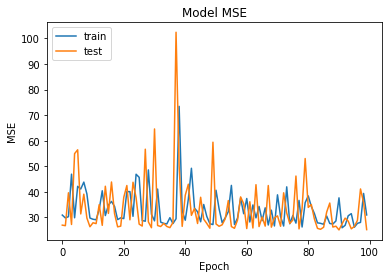

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
# plt.plot(history.history['accuracy'])
plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
print("The Average Mean Squared Error for 50 Epoch is",np.mean(history.history['mean_squared_error']))

The Average Mean Squared Error for 50 Epoch is 89.04018768310547


#### 6. Double the Epochs and run again.  Does the accuracy materially improve ?

In [50]:
# Doubling the epoch to 100
history = mdl_k.fit(
    nn_X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=val_dataset,
    use_multiprocessing=True
)

Epoch 1/100
4/4 [==============================] - 0s 15ms/step - loss: 30.9084 - mean_squared_error: 30.9084 - val_loss: 26.9709 - val_mean_squared_error: 26.9709
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 29.7863 - mean_squared_error: 29.7863 - val_loss: 26.7601 - val_mean_squared_error: 26.7601
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 30.2849 - mean_squared_error: 30.2849 - val_loss: 39.6243 - val_mean_squared_error: 39.6243
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 46.9028 - mean_squared_error: 46.9028 - val_loss: 27.2326 - val_mean_squared_error: 27.2326
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 29.8518 - mean_squared_error: 29.8518 - val_loss: 54.9289 - val_mean_squared_error: 54.9289
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 42.1403 - mean_squared_error: 42.1403 - val_loss: 56.4285 - val_mean_squared_error: 56.4285
Epoch 7/100
4/4 

Epoch 51/100
4/4 [==============================] - 0s 16ms/step - loss: 40.6208 - mean_squared_error: 40.6208 - val_loss: 27.4315 - val_mean_squared_error: 27.4315
Epoch 52/100
4/4 [==============================] - 0s 15ms/step - loss: 33.3629 - mean_squared_error: 33.3629 - val_loss: 26.5255 - val_mean_squared_error: 26.5255
Epoch 53/100
4/4 [==============================] - 0s 15ms/step - loss: 27.9155 - mean_squared_error: 27.9155 - val_loss: 27.1083 - val_mean_squared_error: 27.1083
Epoch 54/100
4/4 [==============================] - 0s 19ms/step - loss: 29.8509 - mean_squared_error: 29.8509 - val_loss: 29.4676 - val_mean_squared_error: 29.4676
Epoch 55/100
4/4 [==============================] - 0s 16ms/step - loss: 32.2475 - mean_squared_error: 32.2475 - val_loss: 36.5850 - val_mean_squared_error: 36.5850
Epoch 56/100
4/4 [==============================] - 0s 26ms/step - loss: 42.5139 - mean_squared_error: 42.5139 - val_loss: 26.4138 - val_mean_squared_error: 26.4138
Epoch 57/1

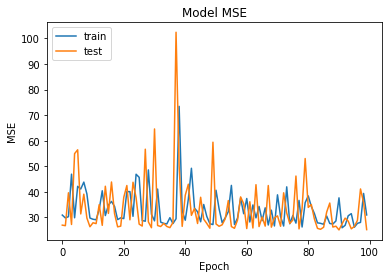

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
# plt.plot(history.history['accuracy'])
plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
print("The Average Mean Squared Error for 100 Epoch is",np.mean(history.history['mean_squared_error']))

The Average Mean Squared Error for 100 Epoch is 33.10060396194458


In [53]:
# Less the MSE good the model
# Conclusion : Increasing the Epoch to double helped to get better result.